In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

查看风格

In [3]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

使用一种风格

In [4]:
plt.style.use("ggplot")

### 1.一般条形图

条形图一般用于表示分类变量的数值大小，或者各类别频数的多少，条形图一般用于数量较多的分类比较，而柱状图一般用于数量较少的分类比较

barh(bottom, width, height=0.8, left=None, **kwargs)

做一个top10票价与对应人名的条形图

In [5]:
#导入数据源
df = pd.read_csv("../Data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df[df['Name'] == 'Abbing, Mr. Anthony']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S


In [12]:
#拥有票价TOP10的人
df_top10 = df.groupby("Name").sum().sort_values(by="Fare",ascending=False)[:10].reset_index()[["Name","Fare"]]
df_top10

,Name,Fare
0,"Ward, Miss. Anna",512.3292
1,"Cardeza, Mr. Thomas Drake Martinez",512.3292
2,"Lesurer, Mr. Gustave J",512.3292
3,"Fortune, Miss. Alice Elizabeth",263.0000
4,"Fortune, Miss. Mabel Helen",263.0000
5,"Fortune, Mr. Charles Alexander",263.0000
6,"Fortune, Mr. Mark",263.0000
7,"Ryerson, Miss. Susan Parker ""Suzette""",262.3750
8,"Ryerson, Miss. Emily Borie",262.3750
9,"Baxter, Mr. Quigg Edmond",247.5208


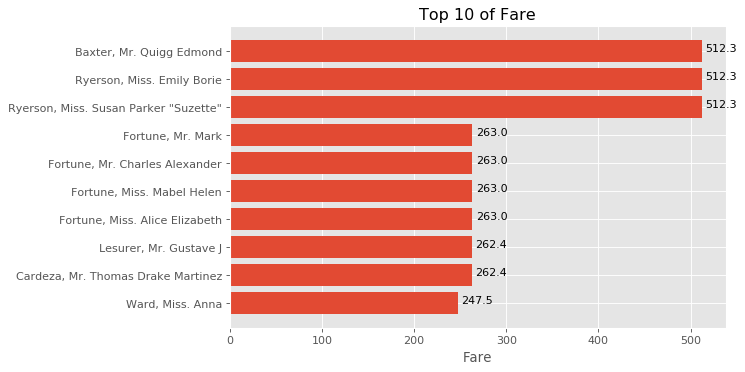

In [13]:
#y轴数据
labels_length = np.arange(len(df_top10["Name"]))
#x轴数据，即表示数据条的长度
values = df_top10["Fare"].round(1).sort_values()
#y轴刻度标签
labels = df_top10["Name"]

#创建figure和axes对象
fig,ax = plt.subplots(figsize=(8,5),dpi=80)
#在子图对象上画条形图，并添加x轴标签，图形的主标题
ax.barh(labels_length,values,tick_label=labels)
#ax.set_xlabel("Fare")
ax.set(xlabel='Fare',title='Top 10 of Fare')
#ax.set_title("top10 of Fare")

#添加数据标签
for a,b in zip(labels_length,values):
    ax.text(b+21,a,b,ha="center")

### 2.旋风图（正负条形图）

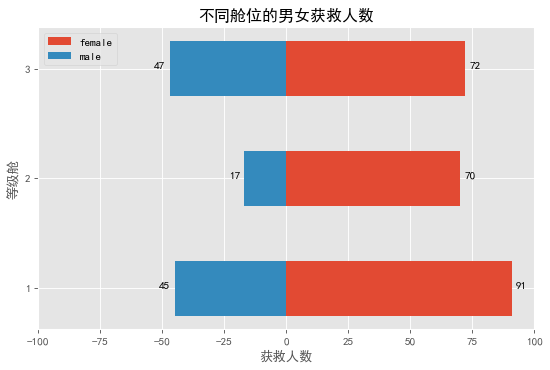

In [97]:
#显示中文字体为SimHei
plt.rcParams["font.sans-serif"]=["SimHei"]
#用来正常显示负号
plt.rcParams['axes.unicode_minus']=False 

#数据源
df_grouped1 = df.groupby(["Sex","Pclass"])["Survived"].sum()
female = df_grouped1.loc["female"]
male = df_grouped1.loc["male"]
labels = df_grouped1.loc["male"].index

#创建figure和axes对象
fig,ax = plt.subplots(figsize=(8,5),dpi=80)

#在子图对象上画条形图
ax.barh(np.arange(len(female)),female,label="female",height=0.5)
ax.barh(np.arange(len(male)),-male,label="male",height=0.5,tick_label=labels)

#添加x轴标签，y轴标签，标题，修改x轴范围，显示图例
ax.set(xlabel="获救人数",ylabel="等级舱",title="不同舱位的男女获救人数")
ax.set_xlim(-100,100)
ax.legend()

#添加数据标签
for a,b in zip(female,np.arange(len(female))):
    ax.text(a+4,b,a,ha="center",fontsize=10)
    
for a,b in zip(male,np.arange(len(male))):
    ax.text(-a-4,b,a,ha="center",fontsize=10)